<a href="https://colab.research.google.com/github/anishatehim/STSCI3740FinalProject/blob/main/PROJECT_ML_FINAL_Zak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from ISLP import load_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from xgboost import XGBRegressor
np.random.seed(1)



In [ ]:
import pandas as pd

# Load the data
aapl_data = pd.read_csv('AAPL.csv')

# Keep only the necessary columns
aapl_data = aapl_data[['date', 'open', 'high', 'low', 'close', 'volume']]

# Format the date as MM/DD/YY
aapl_data['date'] = pd.to_datetime(aapl_data['date']).dt.strftime('%m/%d/%y')

# Rename the columns to uppercase
aapl_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Display the first rows to verify
print(aapl_data.head())


       Date    Open     High     Low    Close    Volume
0  05/27/15  130.34  132.260  130.05  132.045  45833246
1  05/28/15  131.86  131.950  131.10  131.780  30733309
2  05/29/15  131.23  131.450  129.90  130.280  50884452
3  06/01/15  131.20  131.390  130.05  130.535  32112797
4  06/02/15  129.86  130.655  129.32  129.960  33667627


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger le fichier
file_path = 'AAPL.csv'  # Remplacez par le chemin de votre fichier
aapl_data = pd.read_csv(file_path)

# Sélection des colonnes pertinentes
data = aapl_data[['close', 'open', 'high', 'low', 'volume']]

# Diviser les données en caractéristiques (X) et cible (y)
X = data[['open', 'high', 'low', 'volume']]
y = data['close']

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the linear model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Calculate MSE
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("MSE Linear Regression:", mse_linear)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_linear) / y_test)) * 100
print("MAPE (Percentage Error) Linear Regression:", mape)


MSE Linear Regression: 2.014865387586324
MAPE (Percentage Error) Linear Regression: 0.4550255186365283


In [ ]:
from sklearn.linear_model import Ridge

# Regression Ridge
ridge_model = Ridge(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha pour réguler davantage
ridge_model.fit(X_train_scaled, y_train)

# Predictions et MSE
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("MSE Regression Ridge :", mse_ridge)


MSE Regression Ridge : 2.539061439875973


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Bagging with Decision Tree Regressor as the base estimator
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_bagging = bagging_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print("MSE Bagging with Decision Tree:", mse_bagging)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_bagging = np.mean(np.abs((y_test - y_pred_bagging) / y_test)) * 100
print("MAPE (Percentage Error) Bagging with Decision Tree:", mape_bagging)


MSE Bagging with Decision Tree: 3.3311366419840964
MAPE (Percentage Error) Bagging with Decision Tree: 0.6442688954775723


/Users/zakariawalieddine/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


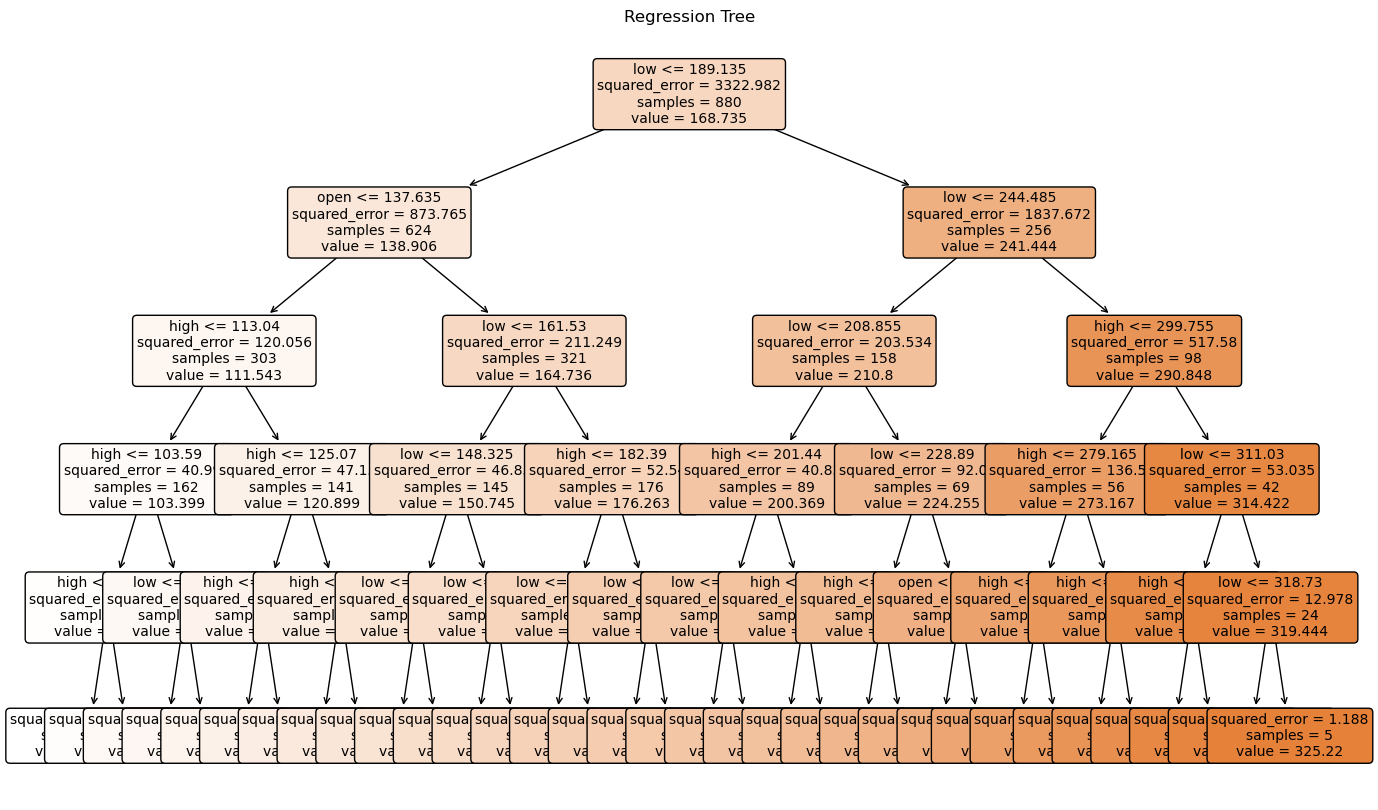

Test Mean Squared Error (MSE): 8.6225


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit a regression tree
tree_model = DecisionTreeRegressor(max_depth=5, random_state=1)  # Limit depth for simplicity
tree_model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Regression Tree")
plt.show()

# Predict on test set
y_pred = tree_model.predict(X_test)

# Calculate test MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error (MSE): {test_mse:.4f}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import datetime as dt

# Charger les données
file_path = 'AAPL.csv'  # Remplacez par le chemin de votre fichier
data = pd.read_csv(file_path)

# Convertir la colonne 'date' en format datetime
data['date'] = pd.to_datetime(data['date'])

# Transformer la date en nombre de jours depuis une référence
data['days_since_start'] = (data['date'] - data['date'].min()).dt.days

# Diviser les données en caractéristiques (X) et cible (y)
X = data[['days_since_start']]
y = data['close']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner un modèle Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Prédictions et calcul du MSE
y_pred = ridge_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("MSE Régression Ridge (en fonction de la date) :", mse)

# Exemple de prédiction pour une date donnée
def predict_price(date_str):
    date = pd.to_datetime(date_str)
    days_since_start = (date - data['date'].min()).days
    days_scaled = scaler.transform([[days_since_start]])
    predicted_price = ridge_model.predict(days_scaled)
    return predicted_price[0]

# Prédire pour une date spécifique
date_to_predict = '2024-12-31'
predicted_price = predict_price(date_to_predict)
print(f"Prix prédit pour la date {date_to_predict} :", predicted_price)


MSE Régression Ridge (en fonction de la date) : 591.6067459953454


TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects.

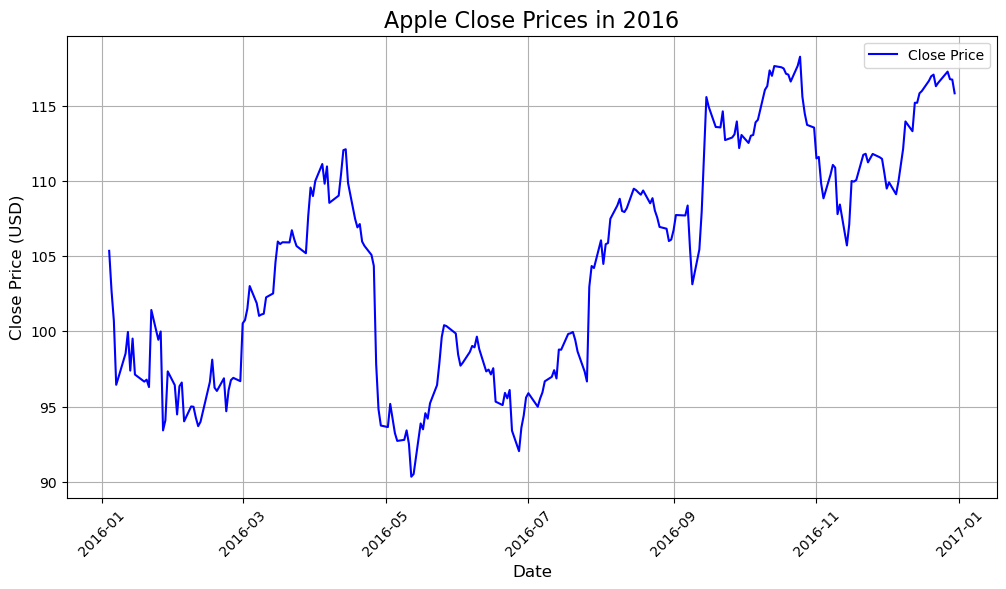

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
aapl_data = pd.read_csv('AAPL.csv')

# Keep only the necessary columns
aapl_data = aapl_data[['date', 'open', 'high', 'low', 'close', 'volume']]

# Convert the date to datetime format for easier filtering
aapl_data['date'] = pd.to_datetime(aapl_data['date'])

# Filter the data for the year 2016
aapl_2016 = aapl_data[aapl_data['date'].dt.year == 2016]

# Plot Close vs. Date
plt.figure(figsize=(12, 6))
plt.plot(aapl_2016['date'], aapl_2016['close'], label='Close Price', color='blue')

# Add titles and labels
plt.title('Apple Close Prices in 2016', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Display the plot
plt.show()



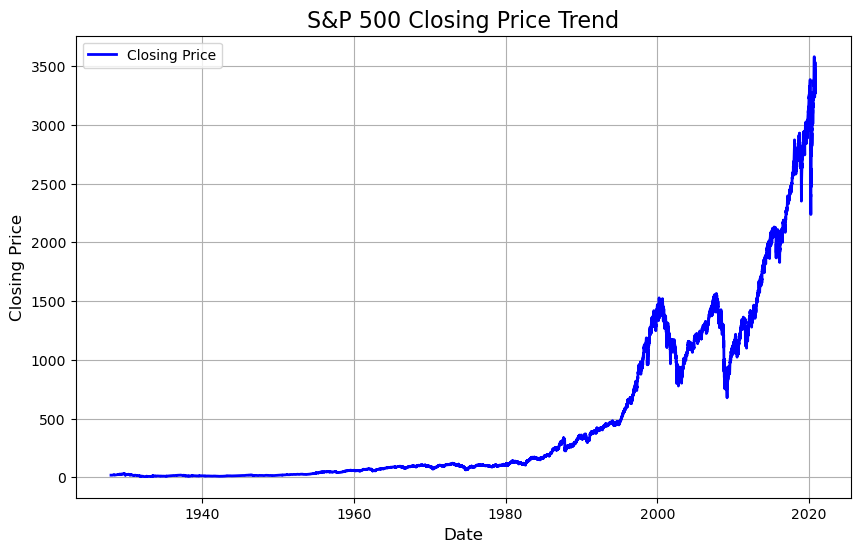

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the SP dataset
sp_data = pd.read_csv('SPX.csv')

# Convert the 'Date' column to datetime format
sp_data['Date'] = pd.to_datetime(sp_data['Date'])

# Plot the closing price vs. date
plt.figure(figsize=(10, 6))
plt.plot(sp_data['Date'], sp_data['Close'], label='Closing Price', color='blue', linewidth=2)

# Add titles and labels
plt.title('S&P 500 Closing Price Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)

# Display the grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


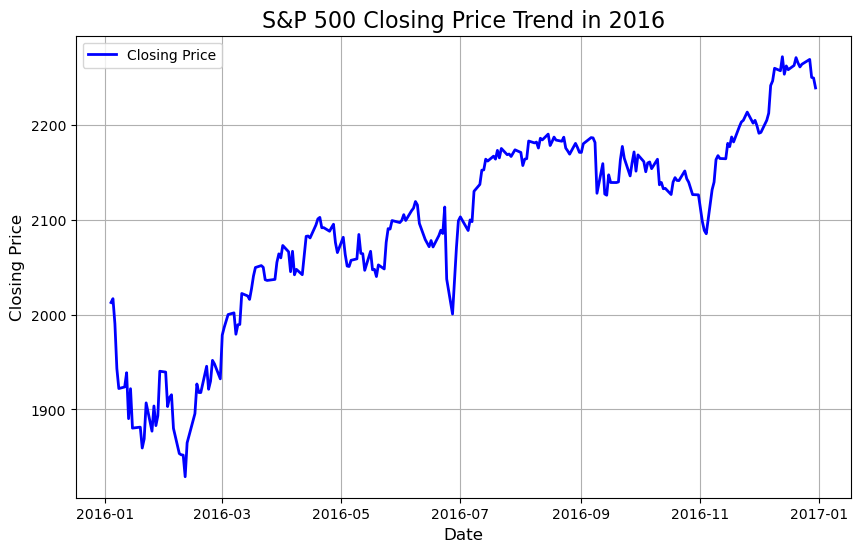

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the SP dataset
sp_data = pd.read_csv('SPX.csv')

# Convert the 'Date' column to datetime format
sp_data['Date'] = pd.to_datetime(sp_data['Date'])

# Filter the data for the year 2016
sp_data_2016 = sp_data[sp_data['Date'].dt.year == 2016]

# Plot the closing price vs. date for 2016
plt.figure(figsize=(10, 6))
plt.plot(sp_data_2016['Date'], sp_data_2016['Close'], label='Closing Price', color='blue', linewidth=2)

# Add titles and labels
plt.title('S&P 500 Closing Price Trend in 2016', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)

# Display the grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


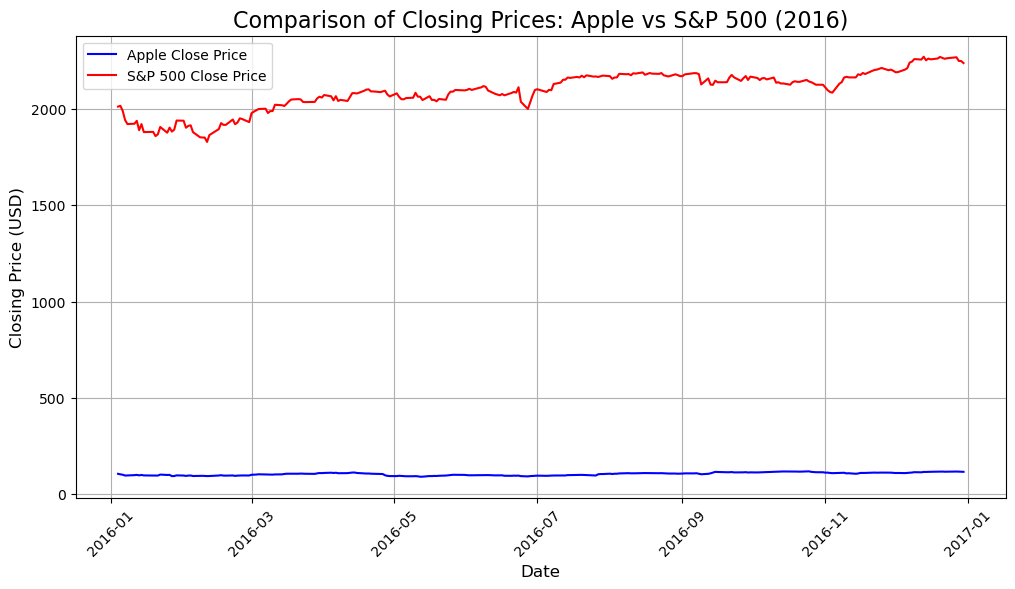

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Apple's data (AAPL.csv)
aapl_data = pd.read_csv('AAPL.csv')

# Keep only the necessary columns
aapl_data = aapl_data[['date', 'open', 'high', 'low', 'close', 'volume']]

# Convert the 'date' column to datetime format for easier filtering
aapl_data['date'] = pd.to_datetime(aapl_data['date'])

# Filter data for the year 2016
aapl_2016 = aapl_data[aapl_data['date'].dt.year == 2016]

# Load S&P 500 data (SPX.csv)
sp_data = pd.read_csv('SPX.csv')

# Convert the 'Date' column to datetime format
sp_data['Date'] = pd.to_datetime(sp_data['Date'])

# Filter data for the year 2016
sp_data_2016 = sp_data[sp_data['Date'].dt.year == 2016]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Apple's closing prices
plt.plot(aapl_2016['date'], aapl_2016['close'], label='Apple Close Price', color='blue')

# Plot S&P 500's closing prices
plt.plot(sp_data_2016['Date'], sp_data_2016['Close'], label='S&P 500 Close Price', color='red')

# Add titles and labels
plt.title('Comparison of Closing Prices: Apple vs S&P 500 (2016)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and legend
plt.grid()
plt.legend()

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# Load Apple's data (AAPL.csv)
aapl_data = pd.read_csv('AAPL.csv')

# Keep only the necessary columns
aapl_data = aapl_data[['date', 'close']]

# Convert the 'date' column to datetime format (removing timezone info if any)
aapl_data['date'] = pd.to_datetime(aapl_data['date']).dt.tz_localize(None)

# Filter data for the year 2016
aapl_2016 = aapl_data[aapl_data['date'].dt.year == 2016]

# Load S&P 500 data (SPX.csv)
sp_data = pd.read_csv('SPX.csv')

# Keep only the necessary columns
sp_data = sp_data[['Date', 'Close']]

# Convert the 'Date' column to datetime format
sp_data['Date'] = pd.to_datetime(sp_data['Date'])

# Filter data for the year 2016
sp_data_2016 = sp_data[sp_data['Date'].dt.year == 2016]

# Merge the two datasets on the date
merged_data = pd.merge(aapl_2016, sp_data_2016, left_on='date', right_on='Date', how='inner')

# Calculate the correlation between Apple's and S&P 500's closing prices
correlation = merged_data['close'].corr(merged_data['Close'])

# Print the correlation result
print(f"The correlation between Apple's and S&P 500's closing prices in 2016 is: {correlation:.4f}")


The correlation between Apple's and S&P 500's closing prices in 2016 is: 0.6560


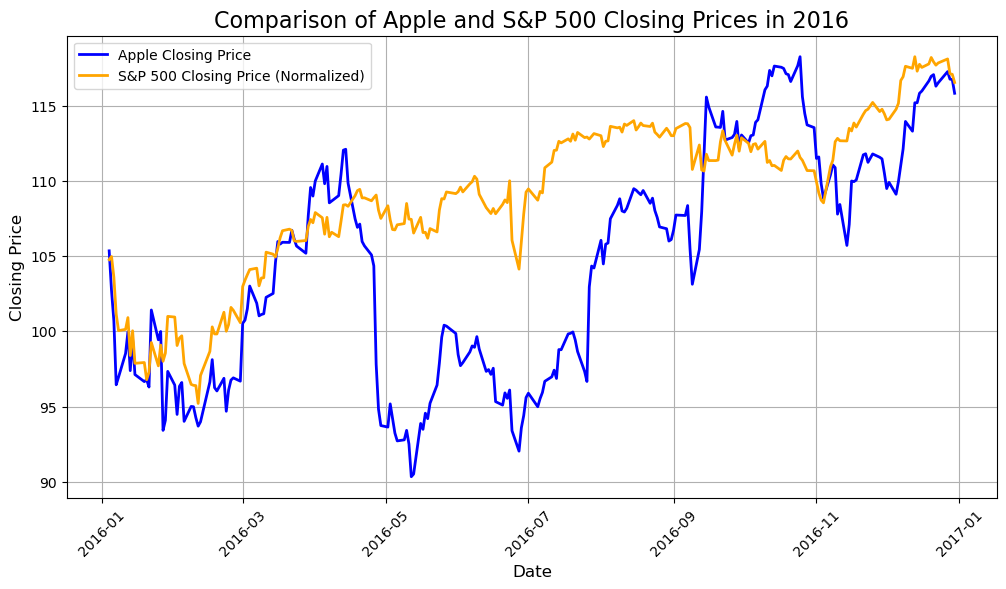

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Apple and S&P 500 datasets
aapl_data = pd.read_csv('AAPL.csv')
sp_data = pd.read_csv('SPX.csv')

# Convert the 'date' and 'Date' columns to datetime format
aapl_data['date'] = pd.to_datetime(aapl_data['date'])
sp_data['Date'] = pd.to_datetime(sp_data['Date'])

# Ensure both date columns have the same time zone (remove time zones if necessary)
aapl_data['date'] = aapl_data['date'].dt.tz_localize(None)
sp_data['Date'] = sp_data['Date'].dt.tz_localize(None)

# Filter the data for the year 2016
aapl_2016 = aapl_data[aapl_data['date'].dt.year == 2016]
sp_data_2016 = sp_data[sp_data['Date'].dt.year == 2016]

# Merge the datasets on the date
merged_data = pd.merge(aapl_2016, sp_data_2016, left_on='date', right_on='Date', how='inner')

# Plot both series on the same graph
plt.figure(figsize=(12, 6))

# Plot Apple's closing price
plt.plot(merged_data['date'], merged_data['close'], label='Apple Closing Price', color='blue', linewidth=2)

# Plot S&P 500's closing price (normalized to match Apple's scale)
normalized_sp_close = merged_data['Close'] / merged_data['Close'].max() * merged_data['close'].max()
plt.plot(merged_data['date'], normalized_sp_close, label='S&P 500 Closing Price (Normalized)', color='orange', linewidth=2)

# Add titles and labels
plt.title('Comparison of Apple and S&P 500 Closing Prices in 2016', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45)

# Display the grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()



In [ ]:
import pandas as pd

# Load the dataset
file_path = 'SAMSUNG.csv'
samsung_data = pd.read_csv(file_path)

# Remove any leading or trailing spaces in column names
samsung_data.columns = samsung_data.columns.str.strip()

# Convert 'Date' to datetime
samsung_data['date'] = pd.to_datetime(samsung_data['Date'], format='%m/%d/%Y')

# Define the exchange rate (for example, 1 USD = 1200 KRW)
exchange_rate = 1200  # 1 USD = 1200 KRW (example)

# Convert the 'Price', 'Open', 'High', 'Low' columns from KRW to USD
samsung_data['close'] = samsung_data['Price'].str.replace(',', '').astype(float) / exchange_rate
samsung_data['open'] = samsung_data['Open'].str.replace(',', '').astype(float) / exchange_rate
samsung_data['high'] = samsung_data['High'].str.replace(',', '').astype(float) / exchange_rate
samsung_data['low'] = samsung_data['Low'].str.replace(',', '').astype(float) / exchange_rate

# Convert 'Vol.' to numeric, handle M (millions) and K (thousands)
def convert_volume(volume):
    if isinstance(volume, str):
        if 'M' in volume:
            return float(volume.replace('M', '').replace(',', '')) * 1_000_000
        elif 'K' in volume:
            return float(volume.replace('K', '').replace(',', '')) * 1_000
    return 0  # Default to 0 if NaN or missing

samsung_data['volume'] = samsung_data['Vol.'].apply(convert_volume)

# Keep only the required columns and sort them
samsung_data = samsung_data[['date', 'close', 'open', 'high', 'low', 'volume']]

# Display the transformed dataset
print(samsung_data.head())



        date      close       open       high        low      volume
0 2020-12-30  67.500000  64.500000  67.750000  64.416667  29120000.0
1 2020-12-29  65.250000  65.666667  65.750000  64.416667     12860.0
2 2020-12-28  65.583333  65.833333  66.750000  65.250000     31840.0
3 2020-12-27  64.833333  64.833333  64.833333  64.833333         0.0
4 2020-12-24  64.833333  61.750000  65.666667  61.666667  32320000.0


Accuracy: 0.5357142857142857
Feature Importance:
  Feature  Coefficient  Absolute Coefficient
0    open    -3.016934              3.016934
2     low     1.912504              1.912504
1    high     1.169336              1.169336
3  volume    -0.292298              0.292298


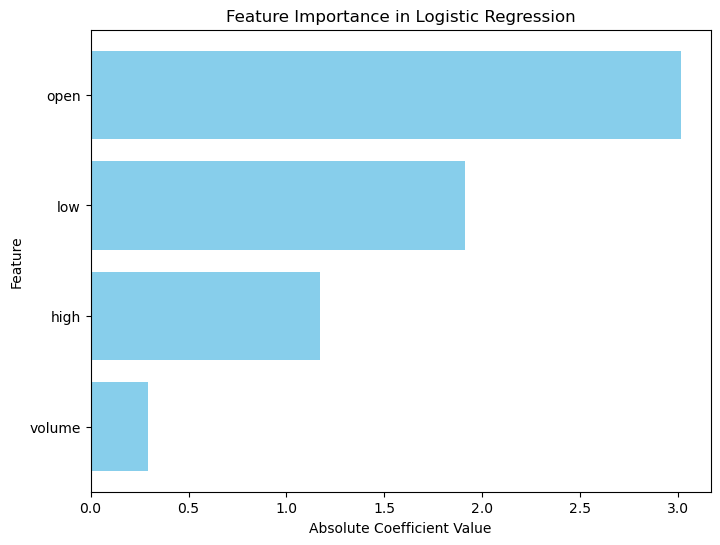

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'AAPL.csv'  # Replace with the path to your file
aapl_data = pd.read_csv(file_path)

# Ensure the 'date' column is in datetime format (optional)
aapl_data['date'] = pd.to_datetime(aapl_data['date'])

# Select relevant features
data = aapl_data[['close', 'open', 'high', 'low', 'volume']]

# Create a copy of the DataFrame before modifying it
data = data.copy()

# Create the shifted 'close' column and the target column safely
data['close_shifted'] = data['close'].shift(1)  # Shift close prices by 1 day
data['target'] = (data['close'] > data['close_shifted']).astype(int)  # 1 for increase, 0 for decrease


# Drop rows with NaN values caused by shifting
data = data.dropna()

# Features (X) and target (y)
X = data[['open', 'high', 'low', 'volume']]
y = data['target']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Get feature importance (coefficients)
coefficients = logistic_model.coef_[0]  # Coefficients for each feature
features = X.columns  # Feature names
importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
importance['Absolute Coefficient'] = np.abs(importance['Coefficient'])
importance = importance.sort_values(by='Absolute Coefficient', ascending=False)

y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print feature importance
print("Feature Importance:")
print(importance)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance['Feature'], importance['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.show()


Accuracy: 0.6111111111111112
Feature Importance:
  Feature  Coefficient  Absolute Coefficient
0    open    -3.016934              3.016934
2     low     1.912504              1.912504
1    high     1.169336              1.169336
3  volume    -0.292298              0.292298


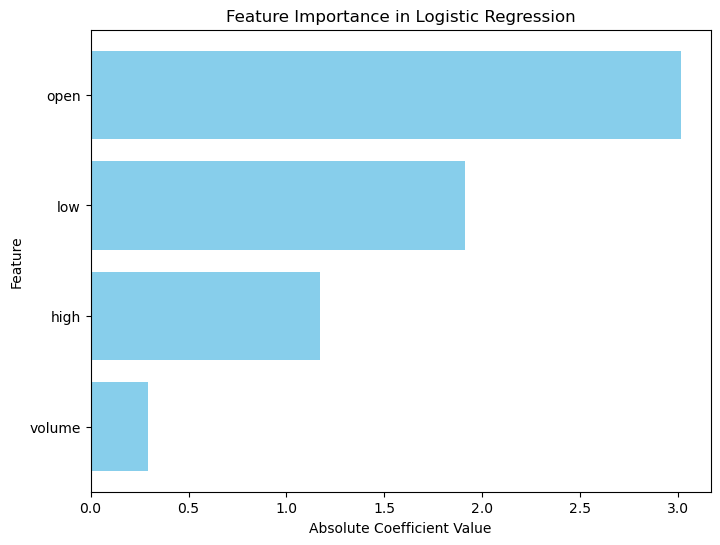

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Charger les données
file_path = 'AAPL.csv'  # Remplacez par le chemin de votre fichier
aapl_data = pd.read_csv(file_path)

# Convertir la colonne 'date' en datetime pour faciliter le filtrage
aapl_data['date'] = pd.to_datetime(aapl_data['date'])

# Filtrer les données pour les années 2015-2018 pour l'entraînement
train_data = aapl_data[aapl_data['date'].dt.year.isin([2015, 2016, 2017, 2018])]

# Filtrer les données pour l'année 2019 pour les tests
test_data = aapl_data[aapl_data['date'].dt.year == 2019]

# Sélectionner les colonnes pertinentes pour l'entraînement et les tests
features = ['open', 'high', 'low', 'volume']
X_train = train_data[features]
y_train = (train_data['close'] > train_data['close'].shift(1)).astype(int)  # 1 si hausse, 0 si baisse
X_test = test_data[features]
y_test = (test_data['close'] > test_data['close'].shift(1)).astype(int)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et entraîner le modèle de régression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Prédictions sur le jeu de test
y_pred = log_reg.predict(X_test_scaled)
# Get feature importance (coefficients)
coefficients = logistic_model.coef_[0]  # Coefficients for each feature
features = X.columns  # Feature names
importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
importance['Absolute Coefficient'] = np.abs(importance['Coefficient'])
importance = importance.sort_values(by='Absolute Coefficient', ascending=False)

y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print feature importance
print("Feature Importance:")
print(importance)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance['Feature'], importance['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.show()




Columns in the DataFrame: Index(['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open',
       'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',
       'divCash', 'splitFactor'],
      dtype='object')


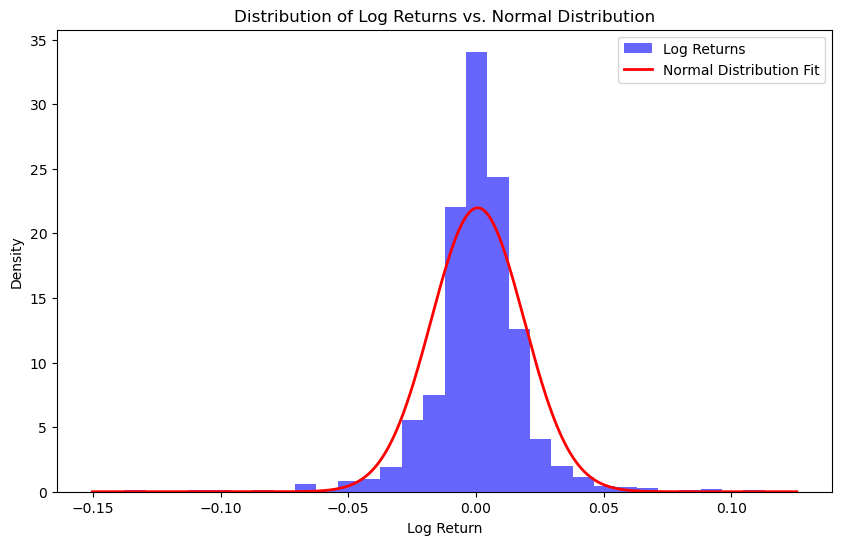

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the AAPL data
file_path = 'AAPL.csv'
data = pd.read_csv(file_path)

# Check the columns to ensure correct data is being used
print("Columns in the DataFrame:", data.columns)

# Convert the Date column to datetime format (optional but useful for analysis)
data['date'] = pd.to_datetime(data['date'])

# Calculate log returns using the 'Close' price column
data['Log Return'] = np.log(data['close'] / data['close'].shift(1))

# Drop NaN values that might appear due to the shift
log_returns = data['Log Return'].dropna()

# Fit a normal distribution to the log returns
mu, std = norm.fit(log_returns)

# Create the histogram of log returns
plt.figure(figsize=(10, 6))
# Histogram of log returns
count, bins, ignored = plt.hist(log_returns, bins=30, density=True, alpha=0.6, color='blue', label='Log Returns')

# Plot the fitted normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Normal Distribution Fit')

# Add labels and title
plt.title('Distribution of Log Returns vs. Normal Distribution')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger le fichier
file_path = 'AAPL.csv'  # Remplacez par le chemin de votre fichier
aapl_data = pd.read_csv(file_path)

# Convertir la colonne 'date' en format datetime
aapl_data['date'] = pd.to_datetime(aapl_data['date'])

# Sélection des colonnes pertinentes
data = aapl_data[['date', 'close', 'open', 'high', 'low', 'volume']]

# Filtrer les données pour l'entraînement (2015-2018) et pour le test (2019)
train_data = data[(data['date'].dt.year >= 2015) & (data['date'].dt.year <= 2018)]
test_data = data[data['date'].dt.year == 2019]

# Diviser en caractéristiques (X) et cible (y)
X_train = train_data[['open', 'high', 'low', 'volume']]
y_train = train_data['close']
X_test = test_data[['open', 'high', 'low', 'volume']]
y_test = test_data['close']

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vérification des tailles des jeux de données
print(f'Training data size: {X_train_scaled.shape}')
print(f'Testing data size: {X_test_scaled.shape}')


Training data size: (907, 4)
Testing data size: (252, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the linear model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Calculate MSE
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("MSE Linear Regression:", mse_linear)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_linear) / y_test)) * 100
print("MAPE (Percentage Error) Linear Regression:", mape)

MSE Linear Regression: 1.3081231651812664
MAPE (Percentage Error) Linear Regression: 0.41060325387054336


In [ ]:
from sklearn.linear_model import Ridge

# Regression Ridge
ridge_model = Ridge(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha pour réguler davantage
ridge_model.fit(X_train_scaled, y_train)

# Predictions et MSE
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("MSE Regression Ridge :", mse_ridge)

MSE Regression Ridge : 1.737109346175494


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Bagging with Decision Tree Regressor as the base estimator
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_bagging = bagging_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print("MSE Bagging with Decision Tree:", mse_bagging)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_bagging = np.mean(np.abs((y_test - y_pred_bagging) / y_test)) * 100
print("MAPE (Percentage Error) Bagging with Decision Tree:", mape_bagging)

MSE Bagging with Decision Tree: 277.04114945619176
MAPE (Percentage Error) Bagging with Decision Tree: 3.0482818895807813


/Users/zakariawalieddine/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:

# Charger le fichier
file_path = 'AAPL.csv'  # Remplacez par le chemin de votre fichier
aapl_data = pd.read_csv(file_path)

# Convertir la colonne 'date' en format datetime
aapl_data['date'] = pd.to_datetime(aapl_data['date'])

# Sélection des colonnes pertinentes
data = aapl_data[['date', 'close', 'open', 'high', 'low', 'volume']]

print(data.head())

                       date    close    open     high     low    volume
0 2015-05-27 00:00:00+00:00  132.045  130.34  132.260  130.05  45833246
1 2015-05-28 00:00:00+00:00  131.780  131.86  131.950  131.10  30733309
2 2015-05-29 00:00:00+00:00  130.280  131.23  131.450  129.90  50884452
3 2015-06-01 00:00:00+00:00  130.535  131.20  131.390  130.05  32112797
4 2015-06-02 00:00:00+00:00  129.960  129.86  130.655  129.32  33667627


In [ ]:
import pandas as pd

# Load the dataset (replace 'AAPL.csv' with your actual file path)
file_path = 'AAPL.csv'
aapl_data = pd.read_csv(file_path)

# Parse the 'date' column, correctly handling the timestamp and timezone
aapl_data['date'] = pd.to_datetime(aapl_data['date'], utc=True)

# Function to get the closing price for a given date
def get_close_price(date_input):
    # Convert the input date to datetime format
    date_input = pd.to_datetime(date_input, utc=True)

    # Search for the exact date in the dataset
    data_for_date = aapl_data[aapl_data['date'] == date_input]

    if not data_for_date.empty:
        # If the date is found, return the closing price
        close_price = data_for_date['close'].values[0]
        print(f"Closing price on {date_input.date()} is: {close_price} USD")
        return close_price
    else:
        print(f"No data available for the date: {date_input.date()}")

        # Suggest the nearest previous trading day (if applicable)
        nearest_date = aapl_data[aapl_data['date'] < date_input]['date'].max()
        if pd.notna(nearest_date):
            nearest_data = aapl_data[aapl_data['date'] == nearest_date]
            close_price = nearest_data['close'].values[0]
            print(f"Nearest available date: {nearest_date.date()}")
            print(f"Closing price on {nearest_date.date()} is: {close_price} USD")
            return close_price
        else:
            print("No earlier data available.")
            return None

# Example usage
date_input = '2022-09-10'  # You can change this to any date you want
real_price = get_close_price(date_input)

# Optionally, compare with a predicted price
if real_price is not None:
    predicted_price = 300  # Example predicted price, replace with actual prediction logic
    print(f"Predicted price for {date_input}: {predicted_price} USD")
    print(f"Difference: {abs(real_price - predicted_price)} USD")


No data available for the date: 2022-09-10
Nearest available date: 2020-05-22
Closing price on 2020-05-22 is: 318.89 USD
Predicted price for 2022-09-10: 300 USD
Difference: 18.889999999999986 USD


In [ ]:
import pandas as pd

# Load the dataset (replace 'SAMSUNG.csv' with your actual file path)
file_path = 'SAMSUNG.csv'
samsung_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(samsung_data.head())


         Date   Price    Open    High     Low    Vol. Change %
0  12/30/2020  81,000  77,400  81,300  77,300  29.12M    3.45%
1  12/29/2020  78,300  78,800  78,900  77,300  12.86K   -0.51%
2  12/28/2020  78,700  79,000  80,100  78,300  31.84K    1.16%
3  12/27/2020  77,800  77,800  77,800  77,800     NaN    0.00%
4  12/24/2020  77,800  74,100  78,800  74,000  32.32M    5.28%


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'SAMSUNG.csv'
samsung_data = pd.read_csv(file_path)

# Remove any leading or trailing spaces in column names
samsung_data.columns = samsung_data.columns.str.strip()

# Convert 'Date' to datetime
samsung_data['date'] = pd.to_datetime(samsung_data['Date'], format='%m/%d/%Y')

# Define the exchange rate (for example, 1 USD = 1200 KRW)
exchange_rate = 1200  # 1 USD = 1200 KRW (example)

# Convert the 'Price', 'Open', 'High', 'Low' columns from KRW to USD
samsung_data['close'] = samsung_data['Price'].str.replace(',', '').astype(float) / exchange_rate
samsung_data['open'] = samsung_data['Open'].str.replace(',', '').astype(float) / exchange_rate
samsung_data['high'] = samsung_data['High'].str.replace(',', '').astype(float) / exchange_rate
samsung_data['low'] = samsung_data['Low'].str.replace(',', '').astype(float) / exchange_rate

# Convert 'Vol.' to numeric, handle M (millions) and K (thousands)
def convert_volume(volume):
    if isinstance(volume, str):
        if 'M' in volume:
            return float(volume.replace('M', '').replace(',', '')) * 1_000_000
        elif 'K' in volume:
            return float(volume.replace('K', '').replace(',', '')) * 1_000
    return 0  # Default to 0 if NaN or missing

samsung_data['volume'] = samsung_data['Vol.'].apply(convert_volume)

# Keep only the required columns and sort them
samsung_data = samsung_data[['date', 'close', 'open', 'high', 'low', 'volume']]

# Display the transformed dataset
print(samsung_data.head())


        date      close       open       high        low      volume
0 2020-12-30  67.500000  64.500000  67.750000  64.416667  29120000.0
1 2020-12-29  65.250000  65.666667  65.750000  64.416667     12860.0
2 2020-12-28  65.583333  65.833333  66.750000  65.250000     31840.0
3 2020-12-27  64.833333  64.833333  64.833333  64.833333         0.0
4 2020-12-24  64.833333  61.750000  65.666667  61.666667  32320000.0


In [ ]:
import pandas as pd

# Charger le dataset
file_path = 'SAMSUNG.csv'
samsung_data = pd.read_csv(file_path)

# Retirer les espaces dans les noms de colonnes
samsung_data.columns = samsung_data.columns.str.strip()

# Convertir les colonnes en types appropriés
samsung_data['date'] = pd.to_datetime(samsung_data['Date'], format='%m/%d/%Y')
samsung_data['close'] = samsung_data['Price'].str.replace(',', '').astype(float)
samsung_data['open'] = samsung_data['Open'].str.replace(',', '').astype(float)
samsung_data['high'] = samsung_data['High'].str.replace(',', '').astype(float)
samsung_data['low'] = samsung_data['Low'].str.replace(',', '').astype(float)

# Fonction pour convertir le volume en nombre
def convert_volume(volume):
    if isinstance(volume, str):
        if 'M' in volume:
            return float(volume.replace('M', '').replace(',', '')) * 1_000_000
        elif 'K' in volume:
            return float(volume.replace('K', '').replace(',', '')) * 1_000
    return 0  # Retourner 0 si NaN ou valeur manquante

samsung_data['volume'] = samsung_data['Vol.'].apply(convert_volume)

# Suppression des lignes avec des valeurs manquantes
samsung_data = samsung_data.dropna()

# Détection des incohérences
# 1. Vérifier les lignes où le prix de clôture est supérieur au prix haut ou inférieur au prix bas
inconsistent_data = samsung_data[(samsung_data['close'] > samsung_data['high']) | (samsung_data['close'] < samsung_data['low'])]

# Afficher les lignes incohérentes détectées
print("Inconsistent data (close > high or close < low):")
print(inconsistent_data)

# 2. Détecter les valeurs aberrantes (outliers) dans les colonnes numériques
# Ici, nous utilisons l'IQR pour identifier les valeurs aberrantes
Q1 = samsung_data[['close', 'open', 'high', 'low']].quantile(0.25)
Q3 = samsung_data[['close', 'open', 'high', 'low']].quantile(0.75)
IQR = Q3 - Q1

# Filtrer les lignes qui sont des outliers
outliers = samsung_data[((samsung_data[['close', 'open', 'high', 'low']] < (Q1 - 1.5 * IQR)) |
                         (samsung_data[['close', 'open', 'high', 'low']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Afficher les lignes détectées comme des outliers
print("\nOutliers detected:")
print(outliers)

# Supprimer les lignes incohérentes ou aberrantes
samsung_data_cleaned = samsung_data[~samsung_data.index.isin(inconsistent_data.index)]  # Supprimer les lignes incohérentes
samsung_data_cleaned = samsung_data_cleaned[~samsung_data_cleaned.index.isin(outliers.index)]  # Supprimer les outliers

# Afficher le dataset nettoyé
print("\nCleaned dataset:")
print(samsung_data_cleaned.head())


Inconsistent data (close > high or close < low):
Empty DataFrame
Columns: [Date, Price, Open, High, Low, Vol., Change %, date, close, open, high, low, volume]
Index: []

Outliers detected:
            Date      Price       Open       High        Low     Vol.  \
908   10/09/2017  2,564,000  2,564,000  2,564,000  2,564,000    0.01K   
1011  05/09/2017  2,351,000  2,351,000  2,351,000  2,351,000    0.04K   
1016  05/01/2017  2,231,000  2,231,000  2,231,000  2,231,000    0.00K   
1080  01/30/2017  1,995,000  1,995,000  1,995,000  1,995,000    0.04K   
1100  01/01/2017  1,802,000  1,802,000  1,802,000  1,802,000    0.01K   
...          ...        ...        ...        ...        ...      ...   
1680  01/08/2015  1,314,000  1,339,000  1,339,000  1,310,000  248.70K   
1681  01/07/2015  1,307,000  1,294,000  1,311,000  1,282,000  283.40K   
1682  01/06/2015  1,295,000  1,315,000  1,317,000  1,288,000  304.55K   
1683  01/05/2015  1,333,000  1,336,000  1,336,000  1,313,000  202.06K   
1685  01

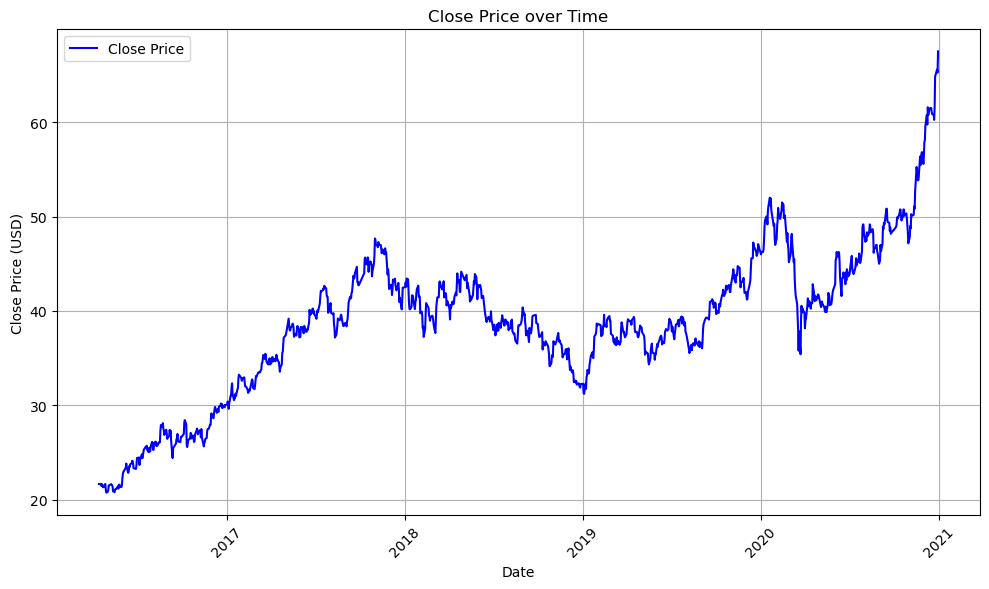

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que le dataset nettoyé soit déjà dans la variable 'samsung_data_cleaned'

# Tracer le prix de clôture en fonction de la date
plt.figure(figsize=(10, 6))
plt.plot(samsung_data_cleaned['date'], samsung_data_cleaned['close']/1200, label='Close Price', color='blue')

# Ajouter des titres et des labels
plt.title('Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(
rotation=45)  # Rotation des dates pour mieux les lire
plt.grid(True)

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

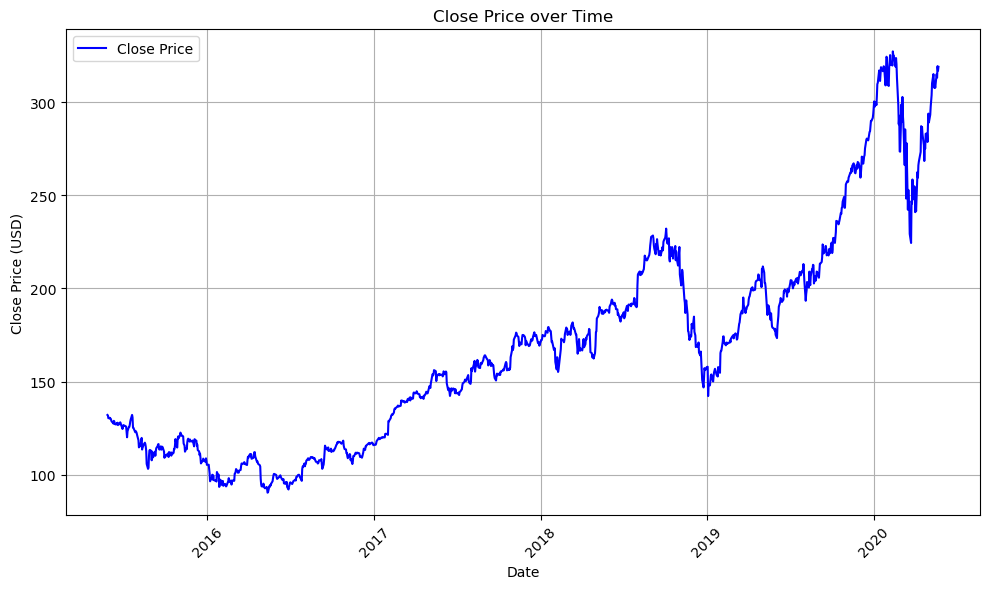

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que le dataset nettoyé soit déjà dans la variable 'samsung_data_cleaned'

# Tracer le prix de clôture en fonction de la date
plt.figure(figsize=(10, 6))
plt.plot(aapl_data['date'], aapl_data['close'], label='Close Price', color='blue')

# Ajouter des titres et des labels
plt.title('Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(
rotation=45)  # Rotation des dates pour mieux les lire
plt.grid(True)

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

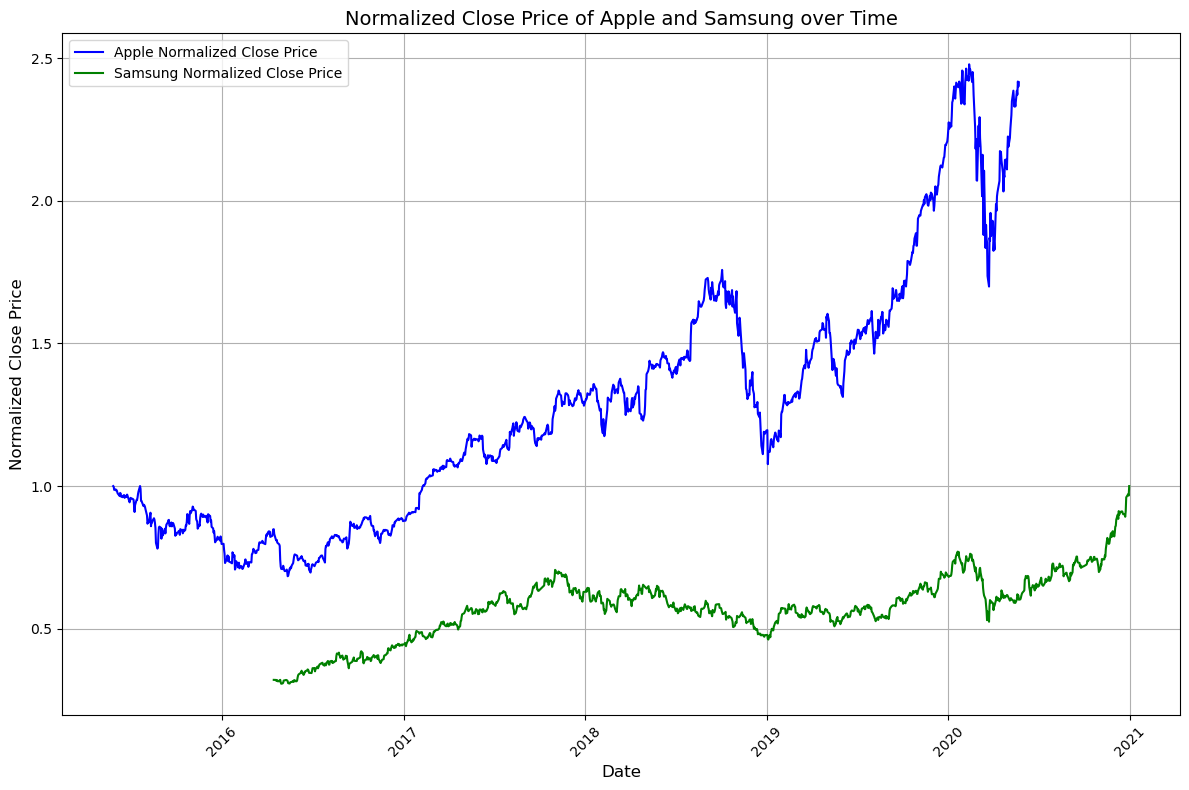

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Normaliser les prix de clôture pour comparer les tendances
aapl_data['normalized_close'] = aapl_data['close'] / aapl_data['close'].iloc[0]
samsung_data_cleaned['normalized_close'] = samsung_data_cleaned['close'] / samsung_data_cleaned['close'].iloc[0]

# Créer une nouvelle figure pour superposer les graphiques normalisés
plt.figure(figsize=(12, 8))

# Tracer le prix de clôture normalisé de Apple
plt.plot(aapl_data['date'], aapl_data['normalized_close'], label='Apple Normalized Close Price', color='blue')

# Tracer le prix de clôture normalisé de Samsung
plt.plot(samsung_data_cleaned['date'], samsung_data_cleaned['normalized_close'], label='Samsung Normalized Close Price', color='green')

# Ajouter des titres et des labels
plt.title('Normalized Close Price of Apple and Samsung over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Close Price', fontsize=12)
plt.xticks(rotation=45)  # Rotation des dates pour mieux les lire
plt.grid(True)

# Afficher la légende
plt.legend()

# Ajuster l'espacement et afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Charger le dataset Samsung nettoyé
file_path_samsung = 'SAMSUNG.csv'
samsung_data = pd.read_csv(file_path_samsung)

# Retirer les espaces dans les noms de colonnes
samsung_data.columns = samsung_data.columns.str.strip()

# Convertir les colonnes en types appropriés
samsung_data['date'] = pd.to_datetime(samsung_data['Date'], format='%m/%d/%Y')
samsung_data['close'] = samsung_data['Price'].str.replace(',', '').astype(float)
samsung_data['open'] = samsung_data['Open'].str.replace(',', '').astype(float)
samsung_data['high'] = samsung_data['High'].str.replace(',', '').astype(float)
samsung_data['low'] = samsung_data['Low'].str.replace(',', '').astype(float)

# Fonction pour convertir le volume en nombre
def convert_volume(volume):
    if isinstance(volume, str):
        if 'M' in volume:
            return float(volume.replace('M', '').replace(',', '')) * 1_000_000
        elif 'K' in volume:
            return float(volume.replace('K', '').replace(',', '')) * 1_000
    return 0  # Retourner 0 si NaN ou valeur manquante

samsung_data['volume'] = samsung_data['Vol.'].apply(convert_volume)

# Suppression des lignes avec des valeurs manquantes
samsung_data = samsung_data.dropna()

# Détection des incohérences
# 1. Vérifier les lignes où le prix de clôture est supérieur au prix haut ou inférieur au prix bas
inconsistent_data = samsung_data[(samsung_data['close'] > samsung_data['high']) | (samsung_data['close'] < samsung_data['low'])]

# 2. Détecter les valeurs aberrantes (outliers) dans les colonnes numériques
Q1 = samsung_data[['close', 'open', 'high', 'low']].quantile(0.25)
Q3 = samsung_data[['close', 'open', 'high', 'low']].quantile(0.75)
IQR = Q3 - Q1

# Filtrer les lignes qui sont des outliers
outliers = samsung_data[((samsung_data[['close', 'open', 'high', 'low']] < (Q1 - 1.5 * IQR)) |
                         (samsung_data[['close', 'open', 'high', 'low']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Supprimer les lignes incohérentes ou aberrantes
samsung_data_cleaned = samsung_data[~samsung_data.index.isin(inconsistent_data.index)]  # Supprimer les lignes incohérentes
samsung_data_cleaned = samsung_data_cleaned[~samsung_data_cleaned.index.isin(outliers.index)]  # Supprimer les outliers

# Charger le dataset Apple (AAPL.csv)
file_path_aapl = 'AAPL.csv'
aapl_data = pd.read_csv(file_path_aapl)

# Garder uniquement les colonnes nécessaires pour Apple
aapl_data = aapl_data[['date', 'close']]

# Convertir la colonne 'date' en format datetime
aapl_data['date'] = pd.to_datetime(aapl_data['date']).dt.tz_localize(None)

# Filtrer les données pour l'année 2016
aapl_2016 = aapl_data[aapl_data['date'].dt.year == 2016]

# Filtrer les données Samsung pour l'année 2016
samsung_2016 = samsung_data_cleaned[samsung_data_cleaned['date'].dt.year == 2016]

# Fusionner les deux datasets sur la date
merged_data = pd.merge(aapl_2016, samsung_2016, on='date', how='inner', suffixes=('_AAPL', '_SAMSUNG'))

# Calculer la corrélation entre les prix de clôture de Apple et Samsung
correlation = merged_data['close_AAPL'].corr(merged_data['close_SAMSUNG'])

# Afficher le résultat de la corrélation
print(f"The correlation between Apple's and Samsung's closing prices in 2016 is: {correlation:.4f}")


The correlation between Apple's and Samsung's closing prices in 2016 is: 0.7660
